In [1]:
import pandas as pd
import numpy as np

In [2]:
housing_price_index = pd.read_csv('/home/ubuntu/my_data/regression/housing_data/Housing Price Index Regression/monthly-hpi.csv')

In [3]:
housing_price_index.head()

,date,housing_price_index
0,2010-11-01,186.07
1,2010-12-01,183.27
2,2011-01-01,181.35
3,2011-02-01,179.66
4,2011-03-01,178.84


In [4]:
unemployment = pd.read_csv('/home/ubuntu/my_data/regression/housing_data/Housing Price Index Regression/unemployment-macro.csv')
fedaral_funds_rate = pd.read_csv('/home/ubuntu/my_data/regression/housing_data/Housing Price Index Regression/fed_funds.csv')
shiller = pd.read_csv('/home/ubuntu/my_data/regression/housing_data/Housing Price Index Regression/shiller.csv')
gross_domestic_product = pd.read_csv('/home/ubuntu/my_data/regression/housing_data/Housing Price Index Regression/gdp.csv')

In [5]:
df = shiller.merge(housing_price_index, on='date')\
               .merge(unemployment, on='date')\
               .merge(fedaral_funds_rate, on='date')\
               .merge(gross_domestic_product, on='date')

In [6]:
df.head()

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,1282.62,220.22,3.39,181.35,16.2,8393,2800,6816,6.5,60.1,0.17,5766.7,64.2,192.7,14881.3
1,2011-04-01,1331.51,224.91,3.46,180.80,16.1,8016,2466,6823,6.8,59.4,0.10,5870.8,64.2,203.1,14989.6
2,2011-07-01,1325.19,225.92,3.00,184.25,15.9,8177,2785,6850,6.8,59.2,0.07,5802.6,64.0,204.6,15021.1
3,2011-10-01,1207.22,226.42,2.15,181.51,15.8,7802,2555,6917,8.0,57.9,0.07,5812.9,64.1,201.1,15190.3
4,2012-01-01,1300.58,226.66,1.97,179.13,15.2,7433,2809,7022,7.4,57.1,0.08,5765.7,63.7,200.7,15291.0


In [7]:
df.shape

(23, 16)

In [8]:
from IPython.display import HTML, display

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [10]:
housing_model = ols("housing_price_index ~ total_unemployed", data=df).fit()

In [11]:
housing_model_summary = housing_model.summary()

In [12]:
HTML(
    housing_model_summary\
        .as_html()\
        .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;">  Adj. R-squared:    </th>')\
        .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')\
        .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')\
        .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')\
        .replace('<th>[95.0% Conf. Int.]</th>', '<th style="background-color:#ff9896;">[95.0% Conf. Int.]</th>')
)

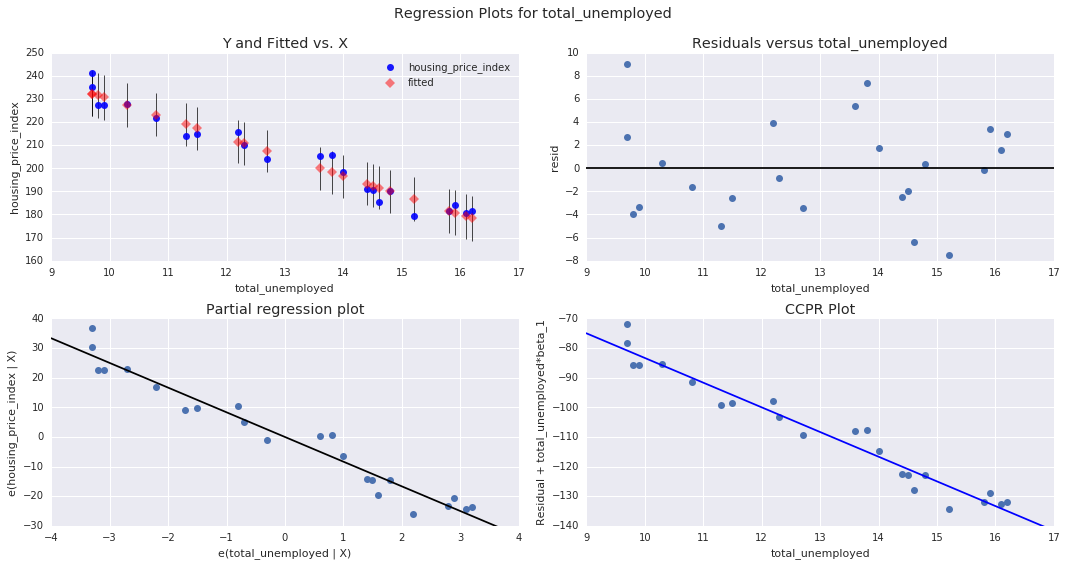

In [13]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(housing_model, "total_unemployed", fig=fig)

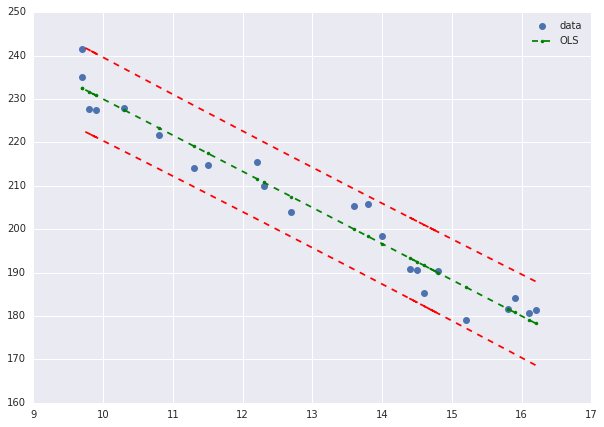

In [15]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

x = df[['total_unemployed']]
y = df[['housing_price_index']]

_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize = (10,7))

ax.plot(x,y,'o', label = "data")

ax.plot(x, housing_model.fittedvalues, 'g--.', label = "OLS")
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')
ax.legend(loc='best')
plt.show()

# Multiple Linear Regression

In [16]:
housing_model = ols("""housing_price_index ~ total_unemployed 
                                            + long_interest_rate 
                                            + federal_funds_rate
                                            + consumer_price_index 
                                            + gross_domestic_product""", data = df).fit()

In [17]:
housing_model_summary = housing_model.summary()

In [18]:
HTML(
    housing_model_summary\
        .as_html()\
        .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;">  Adj. R-squared:    </th>')\
        .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')\
        .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')\
        .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')\
        .replace('<th>[95.0% Conf. Int.]</th>', '<th style="background-color:#ff9896;">[95.0% Conf. Int.]</th>')
)

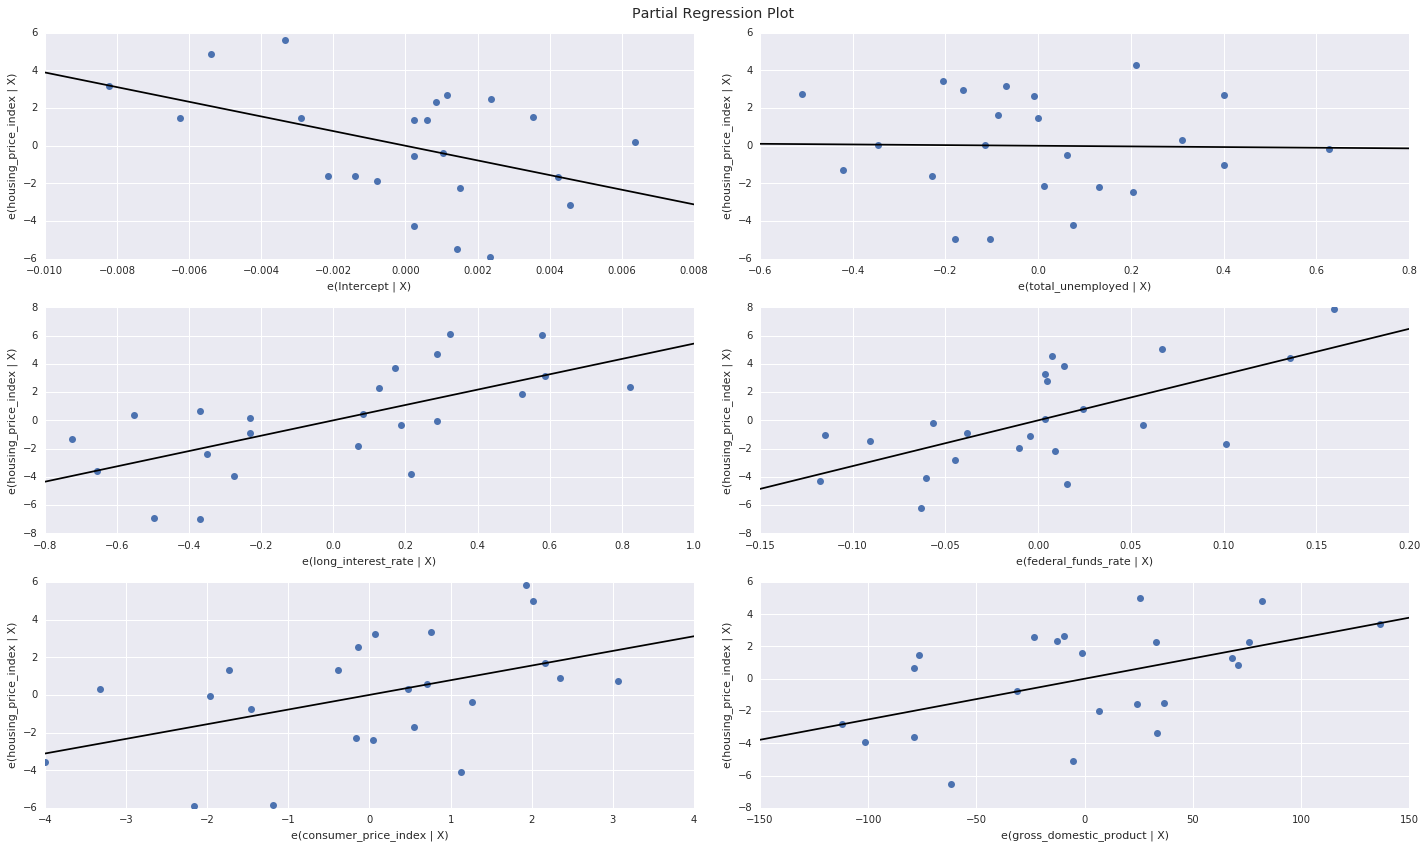

In [19]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(housing_model, fig=fig)